https://github.com/0liu/ISLR/blob/master/Chapter%208%20Tree-Based%20Methods.ipynb

### data

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

# from IPython.display import display
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use("ggplot")
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


######Carseats data in ISLR library in R

In [9]:
carseats = pd.read_csv("/content/drive/My Drive/ISLR/data/Carseats.csv", usecols = range(1, 12))
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


전처리 중

In [14]:
carseats["High"] = (carseats.Sales > 8).astype("int")
carseats["ShelveLoc"] = carseats.ShelveLoc.map({"Bad": 0, "Good": 1, "Medium": 2})
carseats["Urban"] = (carseats.Urban == "Yes").astype("int")
carseats["US"] = (carseats.US == "Yes").astype("int")

In [15]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


######Boston data in MASS library in R

In [29]:
boston = pd.read_csv("/content/drive/My Drive/ISLR/data/Boston.csv", usecols = range(1, 15))
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### (G) Fitted Classification Trees

In [83]:
X = carseats.drop(["Sales", "High"], axis = 1)
y = carseats.High

tree = DecisionTreeClassifier(max_depth = 6)
tree.fit(X, y)
score = tree.score(X, y)

print("Training error rate =", round(1 - score, 4), "\nTree node size =", tree.tree_.node_count)

Training error rate = 0.0825 
Tree node size = 65


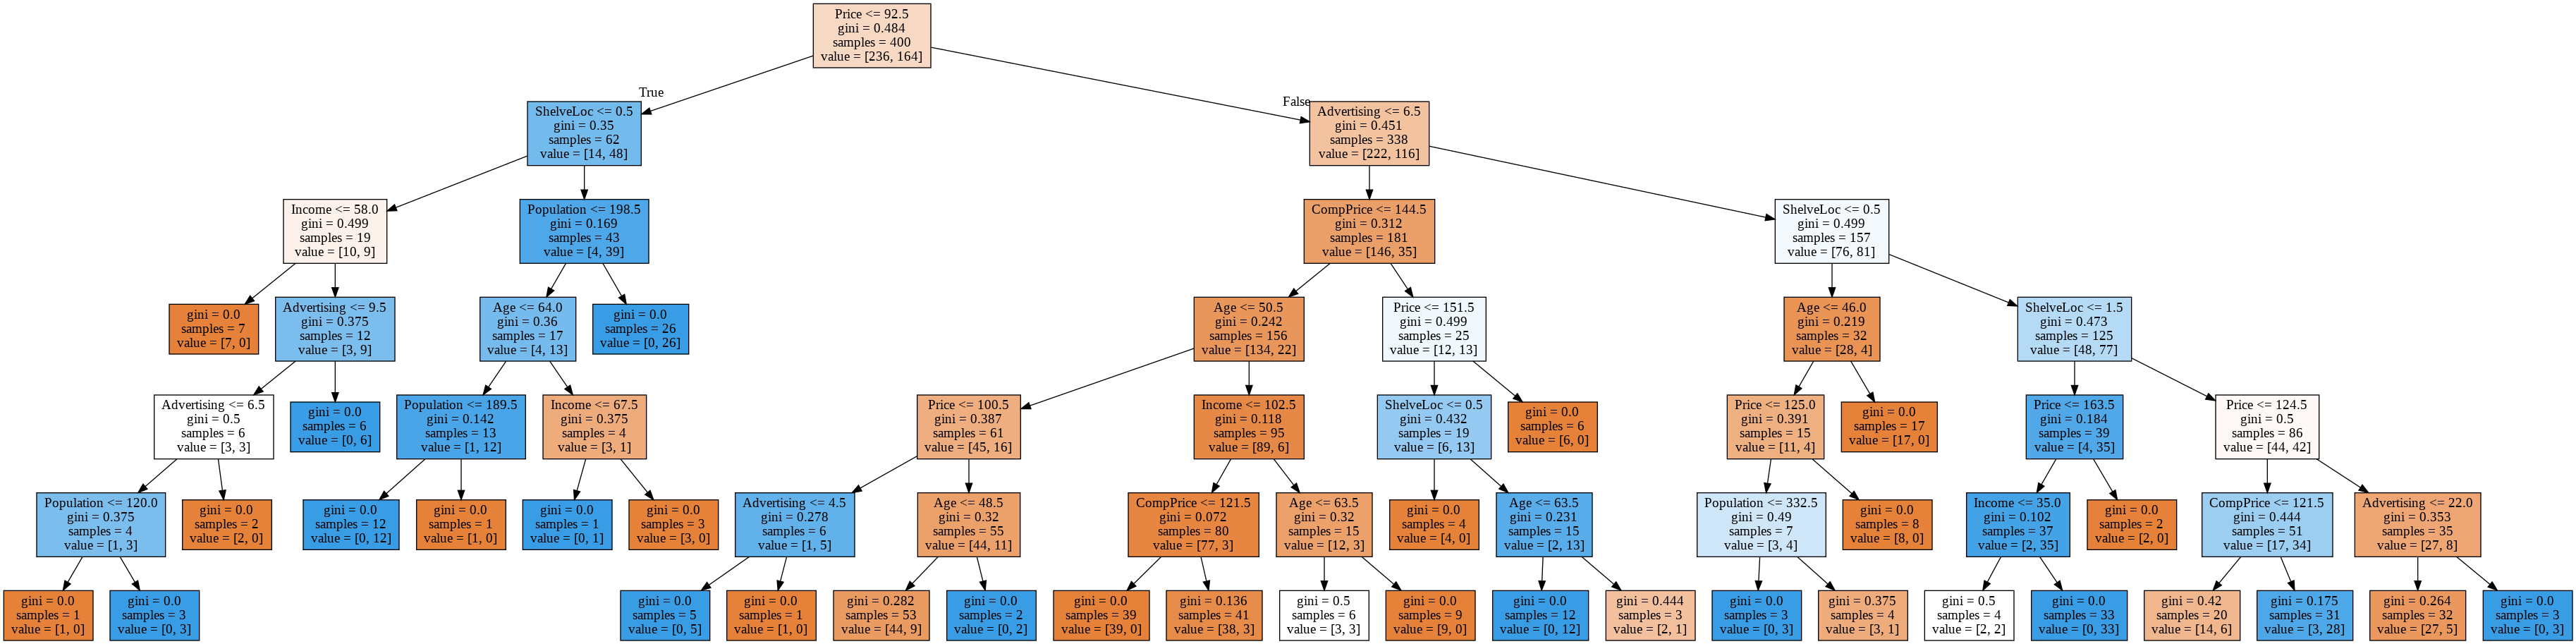

In [43]:
dot_data = export_graphviz(tree, out_file = None, feature_names = X.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width = 2000)

와, 더블 클릭하니까 크게 보여줘. 근데 여전히 어지러워, 뭐가 많아.

In [84]:
Importance = pd.DataFrame({"Importance": tree.feature_importances_}, index = X.columns)
Importance.sort_values("Importance", axis = 0, ascending = True, inplace = True)

In [47]:
Importance

,Importance
Education,0.000000
Urban,0.000000
US,0.000000
Population,0.044869
Income,0.062442
Age,0.094042
CompPrice,0.106703
Advertising,0.182377
ShelveLoc,0.216588
Price,0.292980


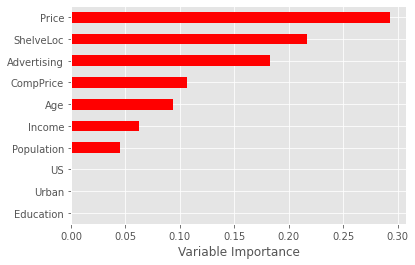

In [56]:
# fig, ax = plt.subplots(figsize = (10, 6)) # 후.. 내가 이거 크기 키우고 말 거다.
Importance.plot(kind = "barh", color = 'r')
plt.xlabel("Variable Importance")
plt.gca().legend_ = None
plt.show()

난 또 100을 곱하길래 숫자가 더러운 줄 알았는데, 굳이 할 필욘 없었음.<br />
이해할 때 percentage가 편하니까 바꾼 듯

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 12)

In [25]:
tree = DecisionTreeClassifier(max_depth = 6)
tree.fit(X_train, y_train)
score = tree.score(X_train, y_train)

print("Training error rate =", round(1 - score, 4),
      "\nTree node size =", tree.tree_.node_count)

Training error rate = 0.015 
Tree node size = 61


In [26]:
y_pred = tree.predict(X_test)
print("Classification Report", classification_report(y_test, y_pred), sep = "\n")

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       118
           1       0.66      0.76      0.70        82

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [27]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = ["No", "Yes"], columns = ["No", "Yes"])
print("Confusion matrix", cm, sep = "\n")

Confusion matrix
     No  Yes
No   86   20
Yes  32   62


### (G) Fitted Regression Trees

In [70]:
X = boston.drop("medv", axis = 1)
y = boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 12)

In [71]:
tree_regr = DecisionTreeRegressor(max_depth = 3)
tree_regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

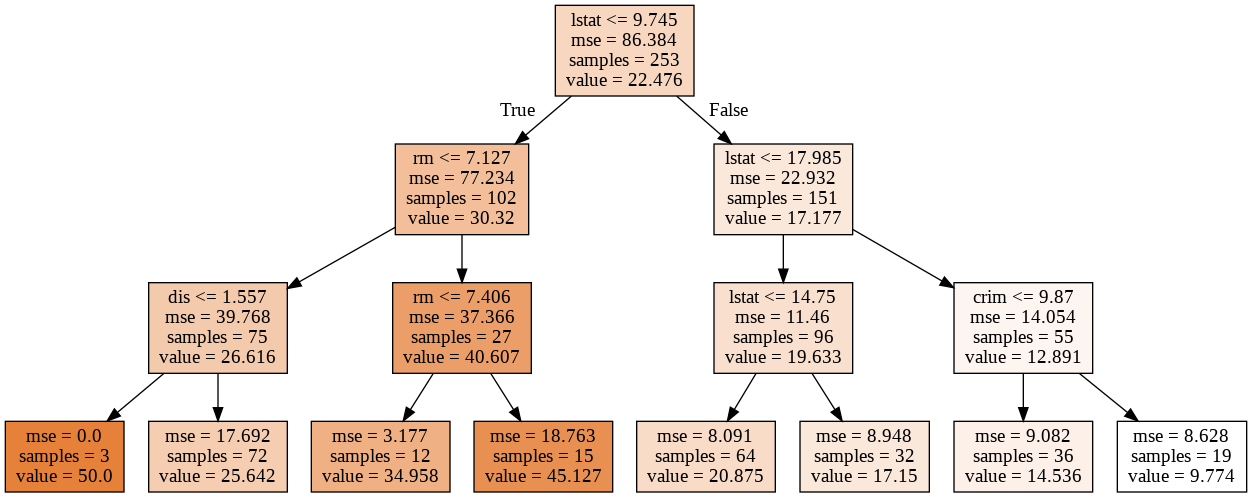

In [72]:
dot_data = export_graphviz(tree_regr, out_file = None, feature_names = X.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width = 2000)

In [73]:
y_pred = tree_regr.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred))

MSE = 22.42853422194836


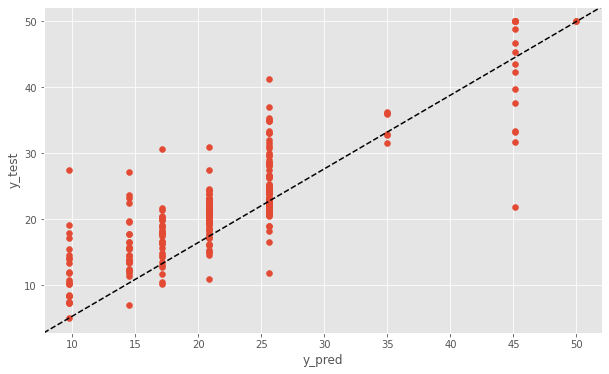

In [74]:
fit, ax = plt.subplots(figsize = (10, 6))
plt.scatter(y_pred, y_test, label = "medv")
plt.plot([0, 1], [0, 1], "--k", transform = plt.gca().transAxes)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

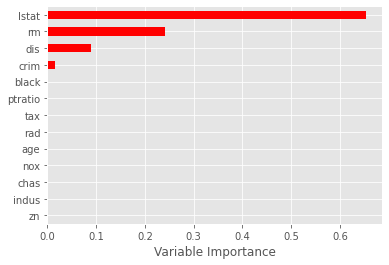

In [75]:
Importance = pd.DataFrame({"Importance": tree_regr.feature_importances_}, index = X.columns)
Importance.sort_values("Importance", axis = 0, ascending = True).plot(kind = "barh", color = 'r')
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

### **Random Forests (using Bagging)**

데이터는 여전히 boston, 따라서 regression

###### the number of features: 13

In [76]:
rf13 = RandomForestRegressor(max_features = 13, random_state = 12)
rf13.fit(X_train, y_train)

y_pred = rf13.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred))

MSE = 12.778267462450595


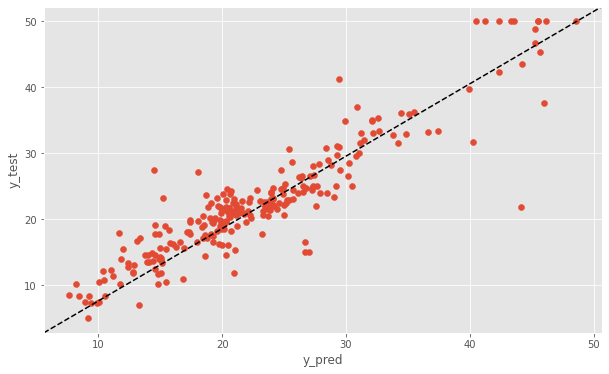

In [77]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(y_pred, y_test, label = "medv")
plt.plot([0, 1], [0, 1], "--k", transform = plt.gca().transAxes)

plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

###### the number of features: 6

In [78]:
rf6 = RandomForestRegressor(max_features = 6, random_state = 12)
rf6.fit(X_train, y_train)

y_pred = rf6.predict(X_test)
print("MSE =", mean_squared_error(y_pred, y_test))

MSE = 10.944408636363638


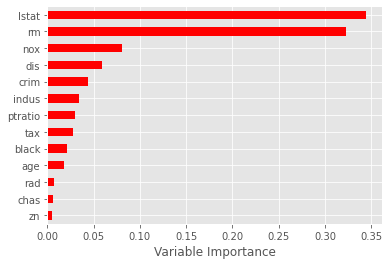

In [79]:
Importance = pd.DataFrame({"Importance": rf6.feature_importances_}, index = X.columns)
Importance.sort_values("Importance", axis = 0, ascending = True).plot(kind = "barh", color = 'r')
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

### **Boosing**

In [80]:
gbr = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01, random_state = 12)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred))

MSE = 11.974388911917202


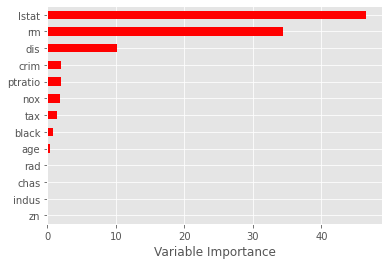

In [82]:
Importance = pd.DataFrame({"Importance": gbr.feature_importances_ * 100}, index = X.columns)
Importance.sort_values("Importance", axis = 0, ascending = True).plot(kind = "barh", color = 'r')
plt.xlabel("Variable Importance")
plt.gca().legend_ = None